Dataset : https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

**Importing libraries for data exploration**

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
sns.set()

In [41]:
import pandas as pd
train_data = pd.read_csv('/content/marketing_campaign.csv')
train_data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [42]:
train_data.shape

(2240, 29)

In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Finding the number of missing values in training data

In [44]:
train_data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Note

1)There are missing values in income

2)Dt_Customer that indicates the date a customer joined the database, its  in object form but we will convert it into datetime

3)There are some categorical features also. So we will enode them later

<ipython-input-45-de84ab6207e0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr())


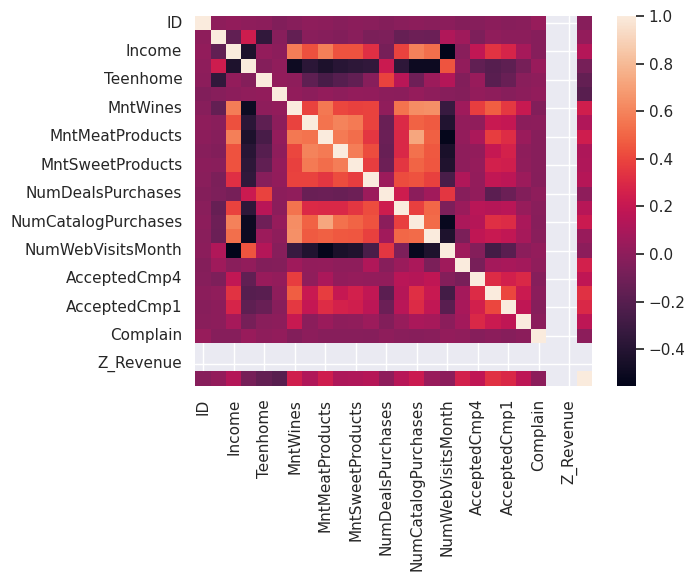

In [45]:
sns.heatmap(train_data.corr())
plt.show()


Lets first try by dropping the missing value, and we will also try by imputing mean of income


In [46]:
train_data = train_data.dropna()
train_data.shape

(2216, 29)

***Feature engineering***

We will now Dt_Cutomer that indicates the number of days a customer is registered in the firm's database. We will take this value relative to the most recent customer in the record. bold text Thus we will also check newest and oldest records.

In [47]:
#Convertinf Dt_customer to datetime
train_data["Dt_Customer"] = pd.to_datetime(train_data["Dt_Customer"])
dates = []
for i in train_data["Dt_Customer"]:
  i = i.date()
  dates.append(i)
#Dates of newest and oldest record
print("Oldest : ", min(dates))
print("Latest : ", max(dates))

Oldest :  2012-07-30
Latest :  2014-06-29


**Feature engeering**

Now we will do some feature enginering and create a column named **Customer_For** , it will show the number of days the customer started to shop on the store relative to the last record date.

**Note**

pandas.to_numeric(arg, errors='raise', downcast=None, dtype_backend=_NoDefault.no_default)


Convert argument to a numeric type.

**The default return dtype is float64 or int64 depending on the data supplied. Use the downcast parameter to obtain other dtypes**

errors{‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
If ‘raise’, then invalid parsing will raise an exception.

If **‘coerce’**, then invalid parsing will be set as NaN.

If ‘ignore’, then invalid parsing will return the input.

In [48]:
days = []
d1 = max(dates)
for i in dates:
  delta = d1 - i
  days.append(delta)
train_data["Customer_For"] = days
train_data["Customer_For"] = pd.to_numeric(train_data["Customer_For"], errors = "coerce")

**EDA(Exploratory Data Analysis) and data exploration**

In [49]:
print("Marital status : ", "\n",train_data['Marital_Status'].value_counts())
print("********************************************************************************")
print("Education status : ", "\n",train_data['Education'].value_counts())

Marital status :  
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
********************************************************************************
Education status :  
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


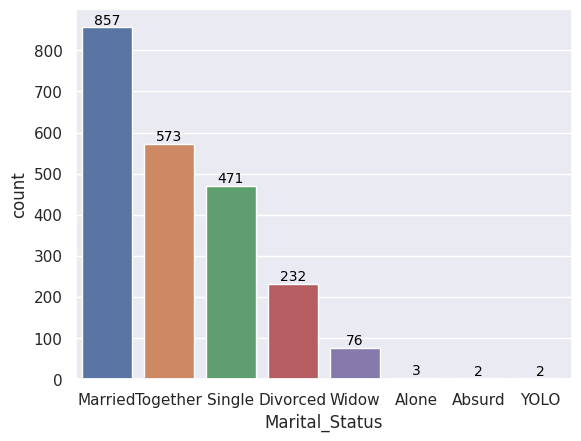

In [50]:
#Counting the categories in martital status
ax = sns.countplot(x = 'Marital_Status', data = train_data, order = train_data['Marital_Status'].value_counts().index)
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=10,
                color='black')
plt.show()

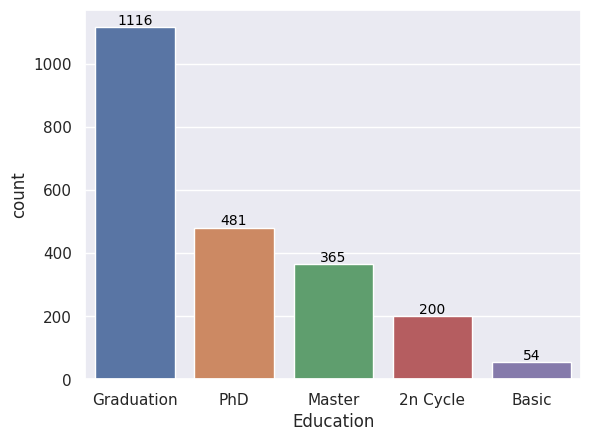

In [51]:
##Counting the categories in education status
ax = sns.countplot(x = 'Education', data = train_data, order = train_data['Education'].value_counts().index)
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=10,
                color='black')
plt.show()

In [52]:
train_data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response       Customer_For  
0         11         1  57283200000000000  
1         11         0   9763200000000000  
2         11         0  26956800000000000  
3         11         0  12009600000000000  
4         11         0  13910400000000000  

[5 rows x 30 columns]

**More feature engineering**:

1)Extarcting **age** of customers by year of birth indicating birth year of respective person.

2)**Ceate a feature sprent** indicating total amount spent by rhe customer in various categories **over span of 2 years**.

3)**Create another feature Living** with out of marital status **to extract the living situation of couples.**

4**)Create a feature children** to indicate total children in a household that is kids and teenagers.

5)To get further clarity if household, **create feture family size.**

6)**Create feature isParent to indicate parenthood status**.

7)Simplify categories in education by implifying value counts.

8)Dropping some of redundant features.

In [53]:
#"age of customers today"
train_data['Age'] = 2023 - train_data["Year_Birth"]


#Total spending on various times
train_data["Spent"]  = train_data["MntWines"] + train_data['MntFruits'] + train_data['MntMeatProducts']  + train_data['MntGoldProds'] + train_data['MntSweetProducts'] + train_data['MntFishProducts']


#Deriving Living out of marital status
# we dont used inplace here to create a new datframe
train_data['Living_With'] = train_data['Marital_Status'].replace({"Married":"Partner", "Together":"Partner",
                                                                             "Absurd":"Alone", "Widow":"Alone",
                                                                             "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})

#Toal childern
train_data['Children'] = train_data['Kidhome'] + train_data['Teenhome']

#Feature for total family in household
train_data['Living_With'] = train_data['Living_With'].replace({'Alone':1, 'Partner':2})
train_data['Living_With'] = train_data['Living_With'].astype('int32')
train_data['Family_Size'] = train_data['Living_With']+train_data['Children']


"""
>>> a = np.arange(10)
>>> a
array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
>>> np.where(a < 5, a, 10*a)
array([ 0,  1,  2,  3,  4, 50, 60, 70, 80, 90])
"""
#prenthood
train_data['Is_Parent']  = np.where(train_data['Children'] > 0, 1, 0)

#Segmenting eduction levels in 3 groups
train_data["Education"] = train_data["Education"].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate',
                                                           'Master':'Postgraduate', 'PhD':'Postgraduate'})

#For clarity(chnaging)
train_data = train_data.rename({'MntWines':'Wines', 'MntFruits':'Fruits', 'MntMeatProducts':'Meat','MntFishProducts':'Fish',
                               'MntSweetProducts':'Sweets', 'MntGoldProducts':'Gold'})

train_data = train_data.drop(['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID'], axis= 1)




In [54]:
train_data.head()

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0      Graduate  58138.0        0         0       58       635         88   
1      Graduate  46344.0        1         1       38        11          1   
2      Graduate  71613.0        0         0       26       426         49   
3      Graduate  26646.0        1         0       26        11          4   
4  Postgraduate  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp2  \
0              546              172                88  ...             0   
1                6                2                 1  ...             0   
2              127              111                21  ...             0   
3               20               10                 3  ...             0   
4              118               46                27  ...             0   

   Complain  Response       Customer_For  Age  Spent  Living_With  Children  \
0         0         1  57283200000000000   66   1617            1         0   
1         0         0   9763200000000000   69     27            1         2   
2         0         0  26956800000000000   58    776            2         0   
3         0         0  12009600000000000   39     53            2         1   
4         0         0  13910400000000000   42    422            2         1   

   Family_Size  Is_Parent  
0            1          0  
1            3          1  
2            2          0  
3            3          1  
4            3          1  

[5 rows x 30 columns]

In [55]:
train_data.describe()

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2216.000000      2216.000000      2216.000000       2216.000000   
mean     26.356047       166.995939        37.637635         27.028881   
std      39.793917       224.283273        54.752082         41.072046   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        68.000000        12.000000          8.000000   
75%      33.000000       232.250000        50.000000         33.000000   
max     199.000000      1725.000000       259.000000        262.000000   

       MntGoldProds  ...  AcceptedCmp2     Complain     Response  \
count   2216.000000  ...   2216.000000  2216.000000  2216.000000   
mean      43.965253  ...      0.013538     0.009477     0.150271   
std       51.815414  ...      0.115588     0.096907     0.357417   
min        0.000000  ...      0.000000     0.000000     0.000000   
25%        9.000000  ...      0.000000     0.000000     0.000000   
50%       24.500000  ...      0.000000     0.000000     0.000000   
75%       56.000000  ...      0.000000     0.000000     0.000000   
max      321.000000  ...      1.000000     1.000000     1.000000   

       Customer_For          Age        Spent  Living_With     Children  \
count  2.216000e+03  2216.000000  2216.000000  2216.000000  2216.000000   
mean   3.054423e+16    54.179603   607.075361     1.645307     0.947202   
std    1.749036e+16    11.985554   602.900476     0.478528     0.749062   
min    0.000000e+00    27.000000     5.000000     1.000000     0.000000   
25%    1.555200e+16    46.000000    69.000000     1.000000     0.000000   
50%    3.071520e+16    53.000000   396.500000     2.000000     1.000000   
75%    4.570560e+16    64.000000  1048.000000     2.000000     1.000000   
max    6.039360e+16   130.000000  2525.000000     2.000000     3.000000   

       Family_Size    Is_Parent  
count  2216.000000  2216.000000  
mean      2.592509     0.714350  
std       0.905722     0.451825  
min       1.000000     0.000000  
25%       2.000000     0.000000  
50%       3.000000     1.000000  
75%       3.000000     1.000000  
max       5.000000     1.000000  

[8 rows x 29 columns]

**Here there are desrepencies/outliers,  as max age is 130.**

**And other in mean and max income and age**

---



In [56]:
from matplotlib import colors

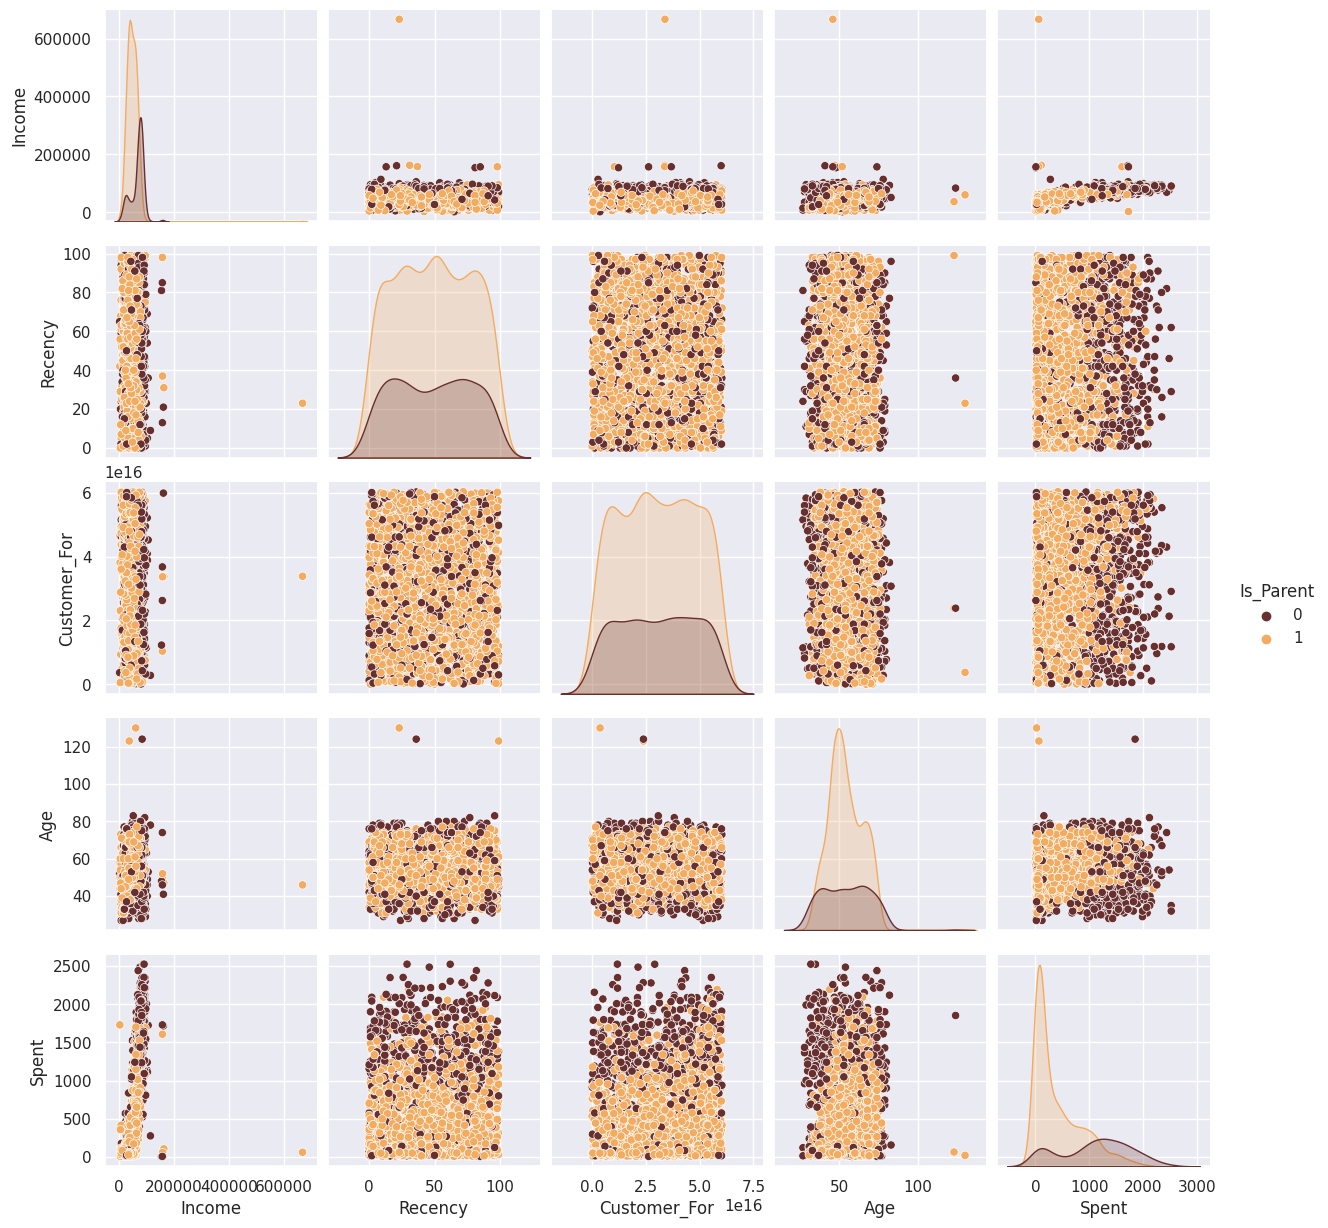

In [57]:
sns.pairplot(train_data[['Income', 'Recency', 'Customer_For', 'Age', 'Spent','Is_Parent']], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue
plt.show()

There are few outliers in income and age features


In [58]:
#Dropping oultliers
train_data = train_data[(train_data['Age'] < 90)]
train_data = train_data[(train_data['Income'] < 600000)]
train_data.shape

(2212, 30)

Dropping outliers 2212<-2216

<ipython-input-59-1e66f07b2152>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, center = 0)


<Axes: >

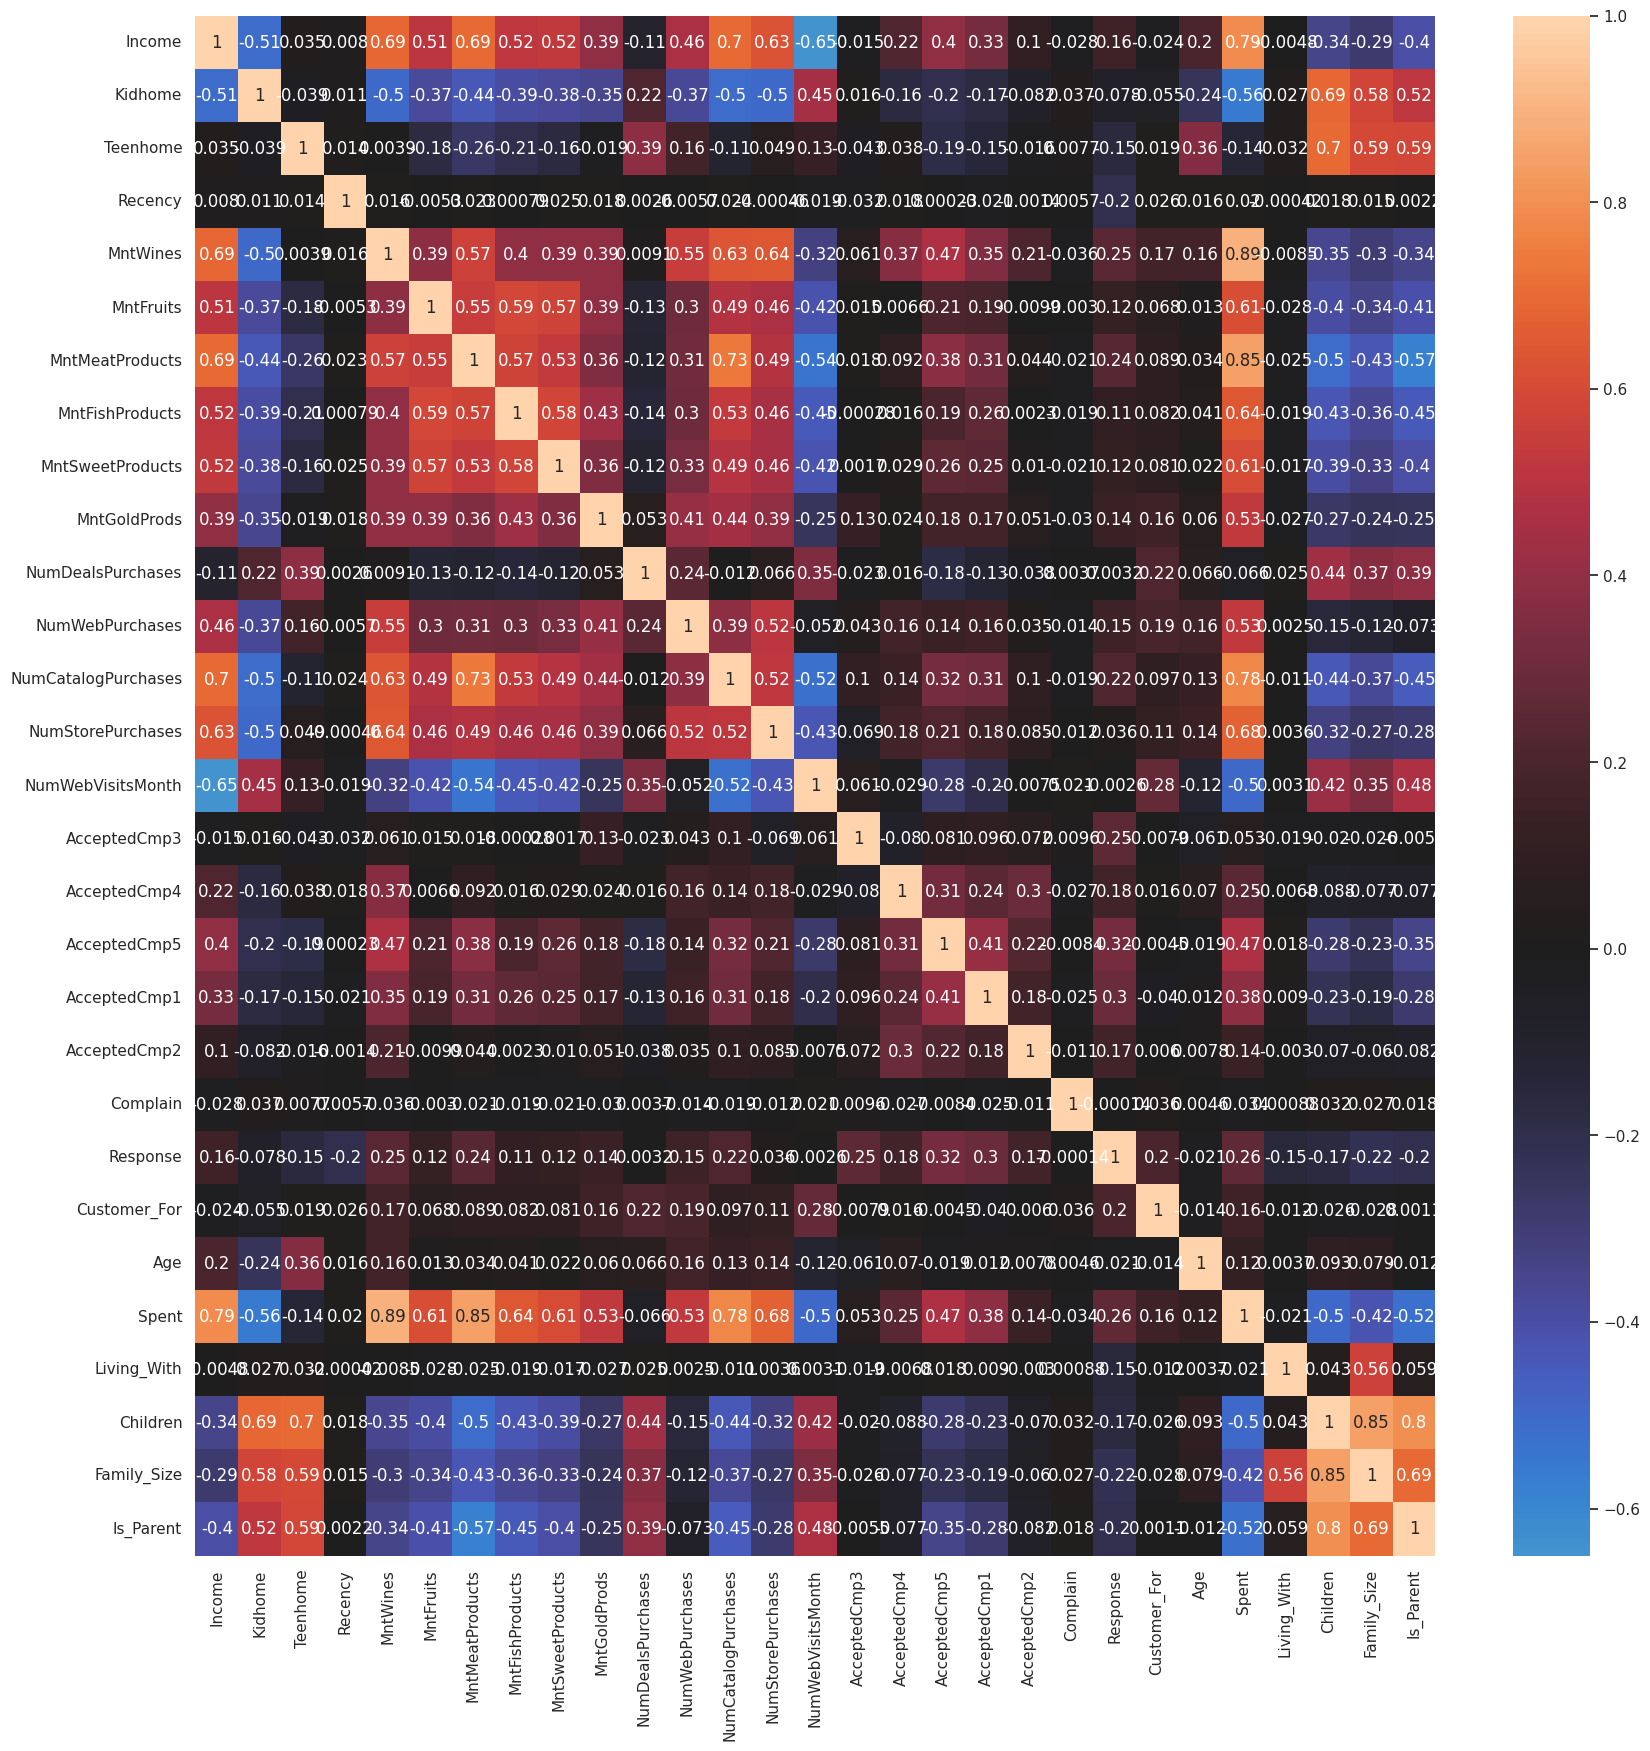

In [59]:
#Now looking for correlation amongst features
plt.figure(figsize = (20,20))
sns.heatmap(train_data.corr(), annot = True, center = 0)

**Data preprocessing**

a)LabelEncoding the categorical features

b)Scaling the features using standard scaler

c)Dimensionlity reduction(Like PCA)

In [60]:
colm = train_data.columns
object_cols = []
for i in colm:
  if train_data[i].dtypes == 'object':
    object_cols.append(i)
print(object_cols)
object_cols.append('Living_With')

['Education']


In [61]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for i in object_cols:
  train_data[i] = train_data[[i]].apply(LE.fit_transform)

In [62]:
#We will now maintain a copy of our data to ensure that main data set is not altered with
ds = train_data.copy()

In [63]:
#Now we will create a subset of dataframe by dropping the features on deals
#accepted and promotion
cols_to_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
               'AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_to_del,axis =1)


In [65]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds= pd.DataFrame(scaler.transform(ds), columns = ds.columns)
print("Now we have scaled all the features")

Now we have scaled all the features


In [66]:
scaled_ds.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Customer_For', 'Age', 'Spent', 'Living_With', 'Children',
       'Family_Size', 'Is_Parent'],
      dtype='object')

In [67]:
scaled_ds.head()

Education    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660   1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618  -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935   0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618  -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257   0.419540   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0         1.690293         2.453472          1.483713  ...   
1        -0.718230        -0.651004         -0.634019  ...   
2        -0.178542         1.339513         -0.147184  ...   
3        -0.655787        -0.504911         -0.585335  ...   
4        -0.218684         0.152508         -0.001133  ...   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Customer_For  \
0             2.503607          -0.555814           0.692181      1.527721   
1            -0.571340          -1.171160          -0.132545     -1.189011   
2            -0.229679           1.290224          -0.544908     -0.206048   
3            -0.913000          -0.555814           0.279818     -1.060584   
4             0.111982           0.059532          -0.132545     -0.951915   

        Age     Spent  Living_With  Children  Family_Size  Is_Parent  
0  1.018352  1.676245    -1.349603 -1.264598    -1.758359  -1.581139  
1  1.274785 -0.963297    -1.349603  1.404572     0.449070   0.632456  
2  0.334530  0.280110     0.740959 -1.264598    -0.654644  -1.581139  
3 -1.289547 -0.920135     0.740959  0.069987     0.449070   0.632456  
4 -1.033114 -0.307562     0.740959  0.069987     0.449070   0.632456  

[5 rows x 23 columns]

**Dimensionlity Reduction**

If dimensionlity reduction is not done, **curse of** **dimensionality** can occur.

And in the above transformed dataframe, there are too many features on the basis of which we can make predictions.
More the dimensions, more can be the overfitting. And as some of the features are highly correalted , hence will  give same results, which can add noise to the data.

We will use **PCA(principal component analysis)** for dimensionality reduction.

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0  2.569775e-16  2.878602 -5.978124 -2.539470 -0.781595  2.386380   
col2  2212.0  7.066881e-17  1.709469 -4.194775 -1.323944 -0.173724  1.234802   
col3  2212.0  7.468408e-17  1.231686 -3.625012 -0.853969 -0.051066  0.864637   

           max  
col1  7.452915  
col2  6.168199  
col3  6.747914

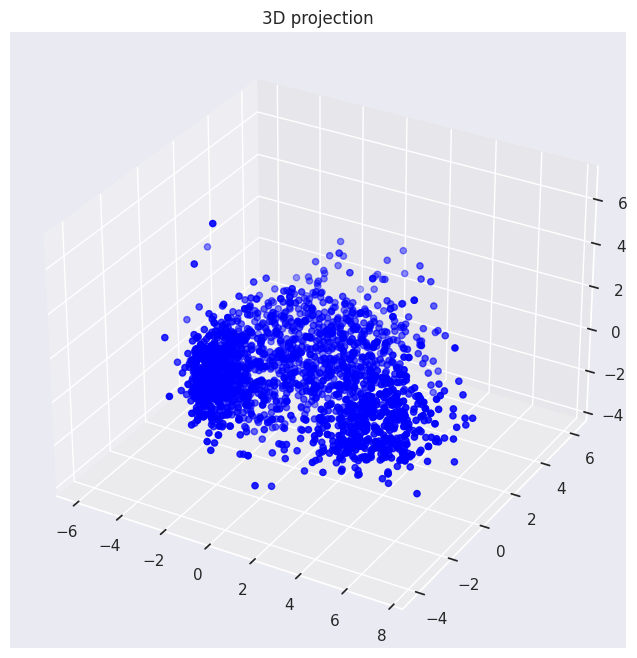

In [69]:
#3d projection of data in reduced dimension
x = PCA_ds['col1']
y = PCA_ds['col2']
z = PCA_ds['col3']
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x, y, z, c = "blue", marker = 'o')
ax.set_title("3D projection")
plt.show()

**Clustering-1 : Agglomerative Clustering**

Now we wil try to do Agglomerative Clustering.

It is a **hierarchical clustering method**.

*It involves merging examples until the desired number of clusters are achieved*

Steps  

-Elbow method to determine the number of optimum clusters

-Clustering via Agglomerative Clustering

-Examining clusters via scatter plots

Elbow method to find number of clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

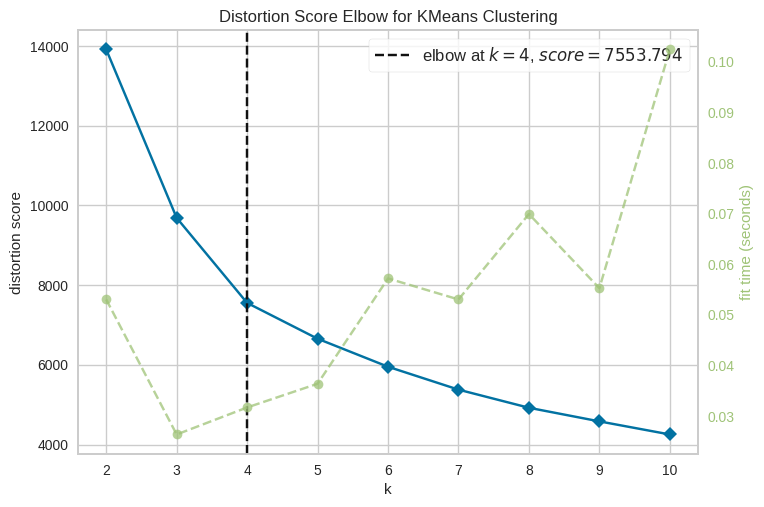

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [70]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
print("Elbow method to find number of clusters")
Elbow_M = KElbowVisualizer(KMeans(), k = 10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [71]:
#Implementing the Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters = 4)
#yhat = predicted values
y_hat = AC.fit_predict(PCA_ds)
PCA_ds['Clusters'] = y_hat

#Adding clusters to original dataframe
train_data["Clusters"] = y_hat

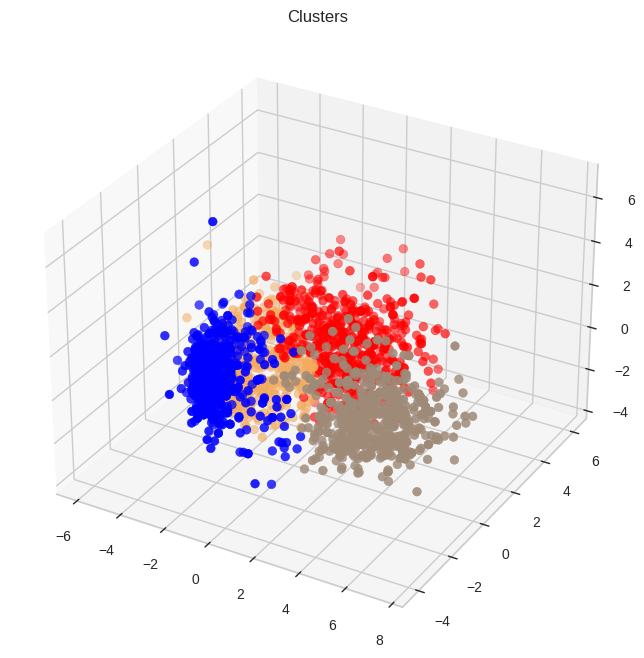

In [72]:
fig = plt.figure(figsize = (10,8))
ax = plt.subplot(111, projection = '3d', label = 'bla')
ax.scatter(x, y, z, s = 40, c = PCA_ds['Clusters'],
           marker = 'o',cmap = colors.ListedColormap(["#FF0000", "#9E726F", "#0000FF", "#B9C0C9", "#9F8A78", "#F3AB60"])
)
ax.set_title('Clusters')
plt.show()

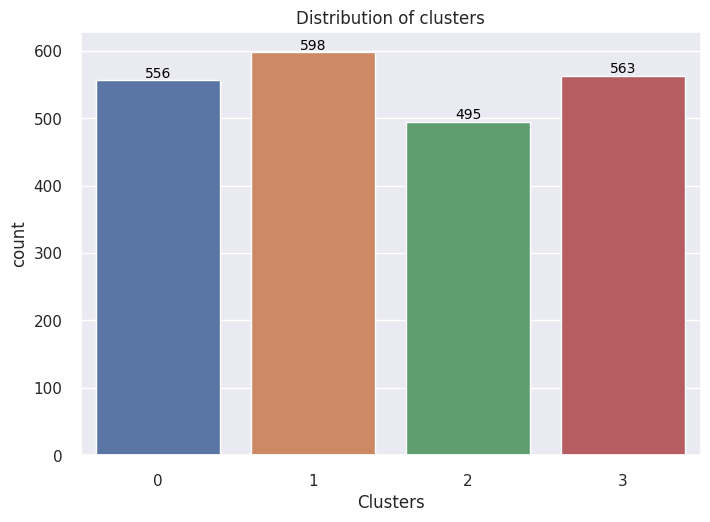

In [73]:
sns.set()
ax = sns.countplot(x = train_data["Clusters"])
ax.set_title("Distribution of clusters")
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=10,
                color='black')
plt.show()


Visualizing agglomerative clustering through scatter plot between income and spending.

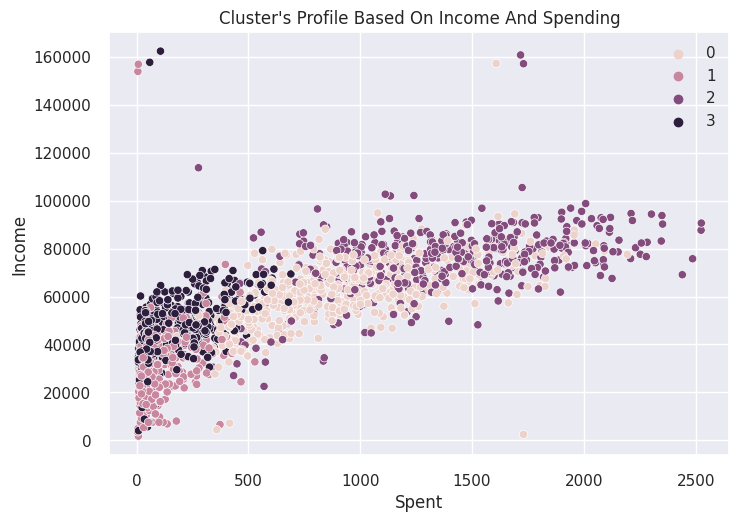

In [74]:
pl = sns.scatterplot(data = train_data,x=train_data["Spent"], y=train_data["Income"],hue=train_data["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 71.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 56.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 22.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 74.2% of the points cannot be plac

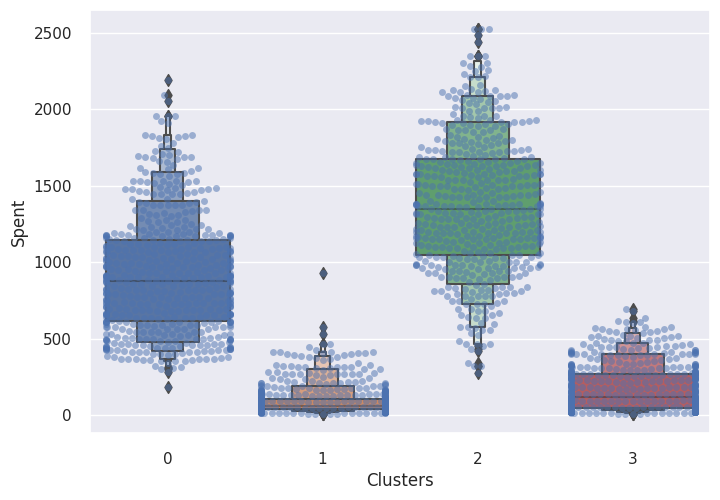

In [75]:
pl = sns.swarmplot(x = train_data['Clusters'], y = train_data['Spent'],
                   alpha = 0.50)
pl = sns.boxenplot(x = train_data['Clusters'],
                   y = train_data['Spent'])
plt.show()

Boxplot

**Aim is to show the minimum and maximum, 25 and 75 quantile** **the median. And upper and lower outlier if any.**


**Some more feature engineering to explore about number** **of** **promotions accepted in past campaigns**.

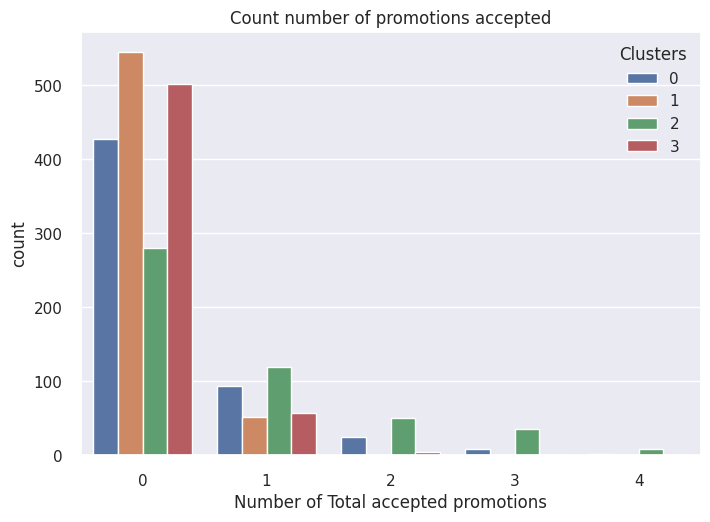

In [76]:
# We will now explore how our campaigns went in the past(sum of accepted promotions)
train_data['Total_Promos'] = (train_data['AcceptedCmp1'] + train_data['AcceptedCmp2'] + train_data['AcceptedCmp3'] +
                              train_data['AcceptedCmp4'] + train_data['AcceptedCmp5'])

#Plotting count of total campaign acecpted
plt.figure()
ax = sns.countplot(x = train_data['Total_Promos'], hue = train_data["Clusters"])
ax.set_title("Count number of promotions accepted")
ax.set_xlabel('Number of Total accepted promotions')
plt.show()

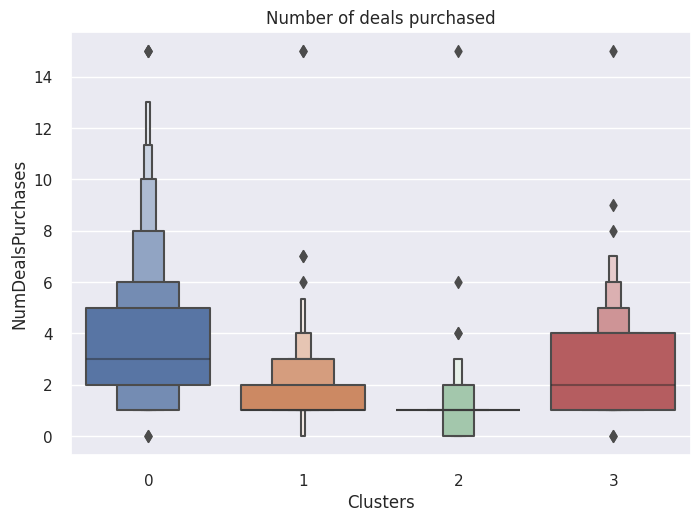

In [77]:
#Plotting number of deals purchased
plt.figure()
ax = sns.boxenplot(y = train_data['NumDealsPurchases'], x = train_data['Clusters'])
ax.set_title('Number of deals purchased')
plt.show()

**Now we will profile clusters formed and come to a** **conclusion about who is our star customer and who needs** **more attention from the retail store's marketing team**.


<Figure size 800x550 with 0 Axes>

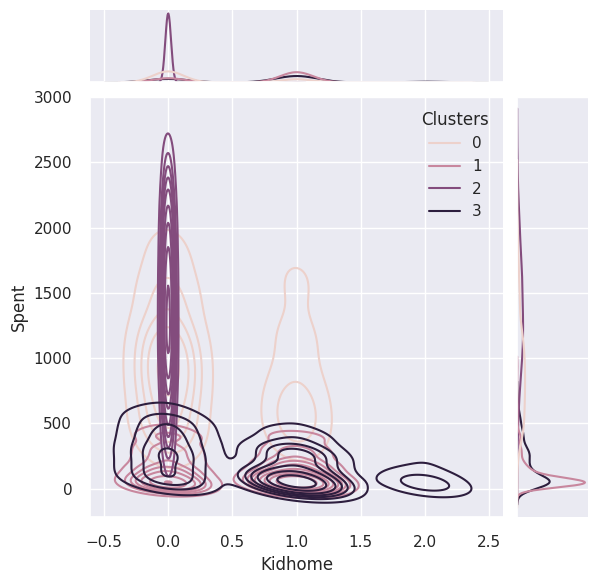

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

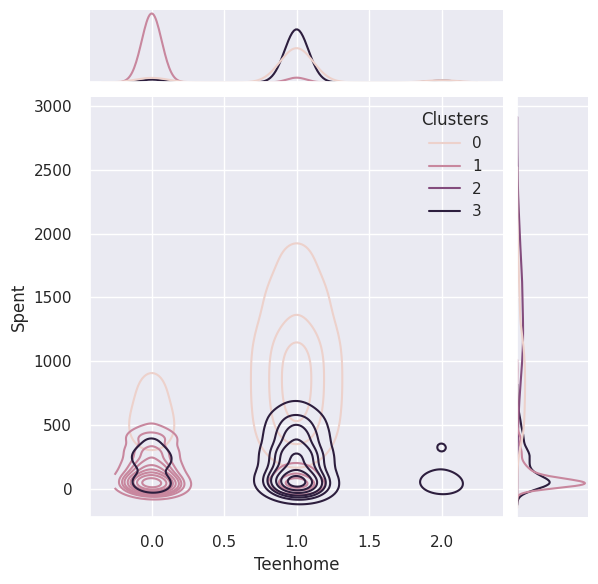

<Figure size 800x550 with 0 Axes>

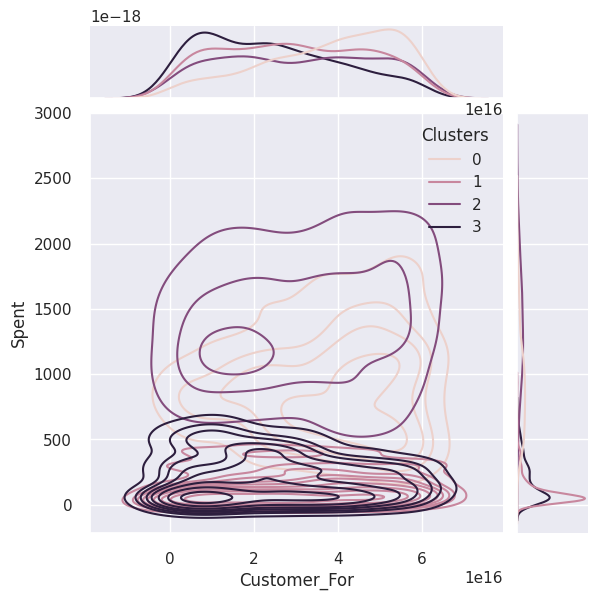

<Figure size 800x550 with 0 Axes>

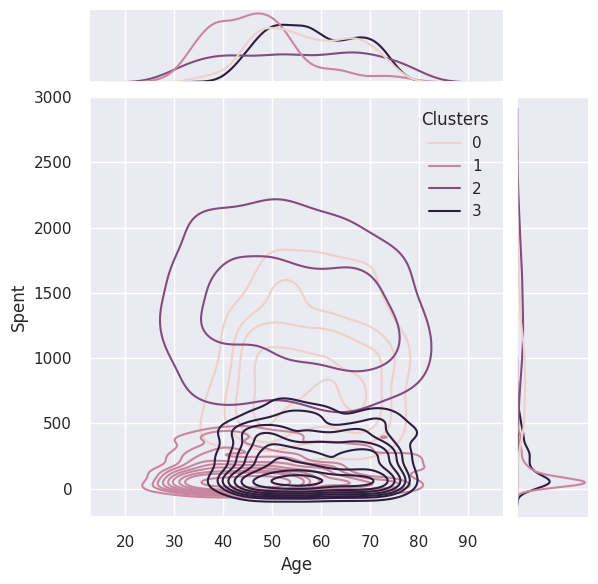

<Figure size 800x550 with 0 Axes>

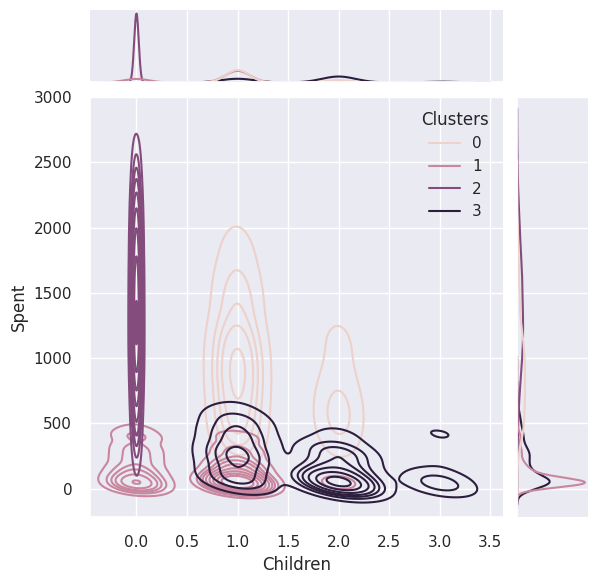

<Figure size 800x550 with 0 Axes>

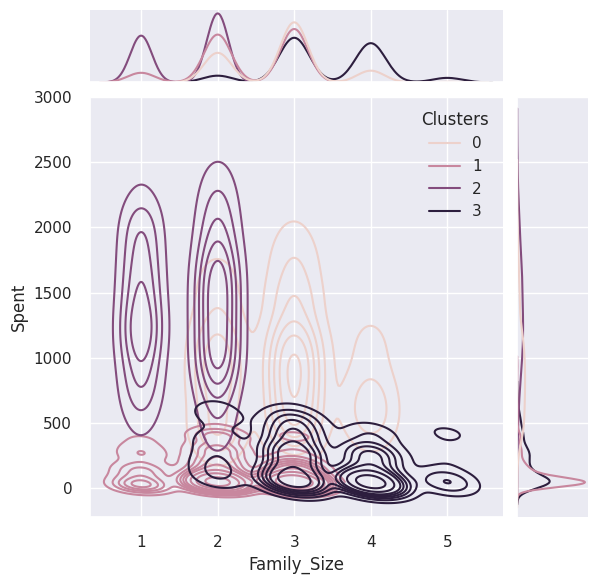

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

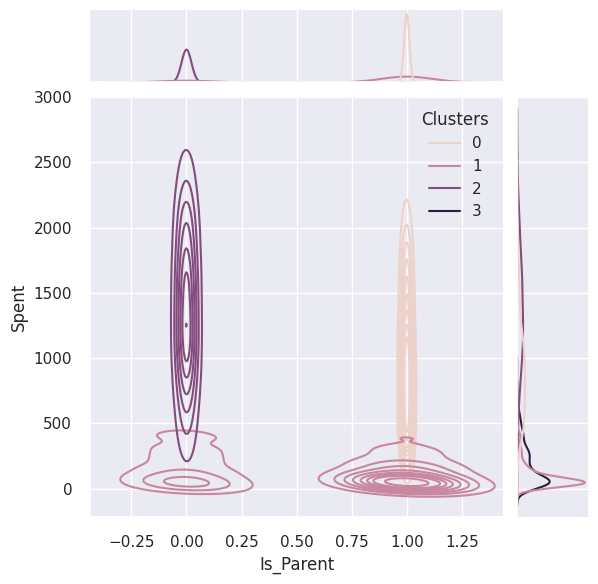

<Figure size 800x550 with 0 Axes>

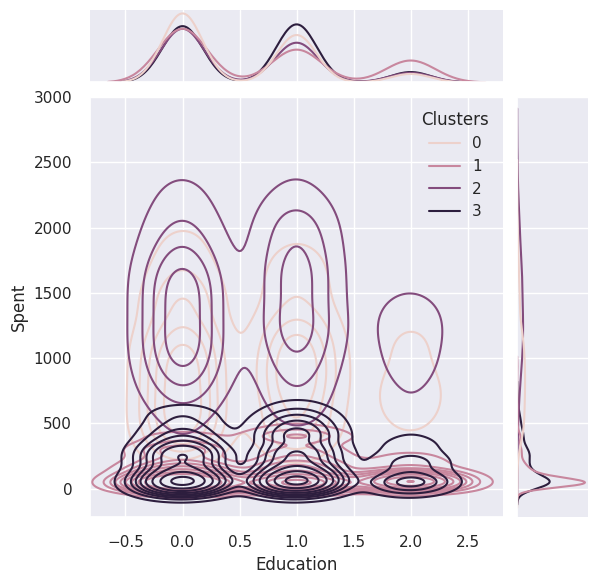

<Figure size 800x550 with 0 Axes>

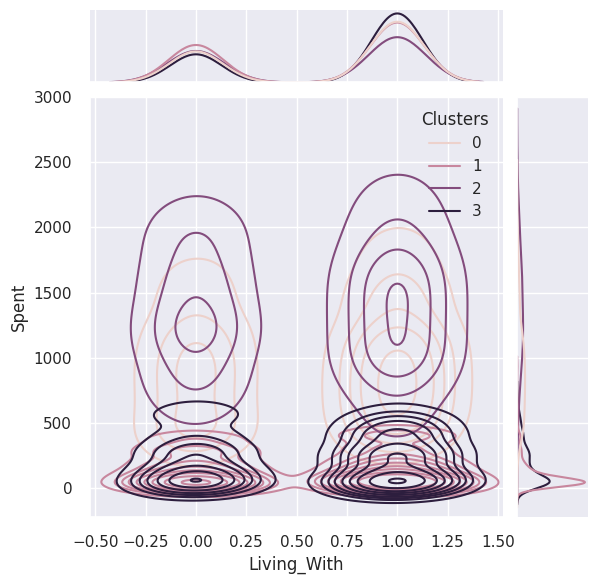

In [78]:

Colum = ['Kidhome', 'Teenhome', 'Customer_For', 'Age','Children', 'Family_Size',
         'Is_Parent', 'Education', 'Living_With']
for i in Colum:
  plt.figure()
  sns.jointplot(x = train_data[i], y = train_data['Spent'], hue = train_data['Clusters'], kind = 'kde')
  plt.show()

**Insights(from agglomerate clustering)**

**Cluster 0**

- A parent

- Family_size between 2 and 4

- Teenagers at home

- Is older

- Spent in moderate to high and income is also moderate to high.


**Cluster 1**

- Can be a parent

- Family size is between 1 and 3

- Mostly on younger side but not teenagers

- Low spent and Low income




**Cluster 2**

- High income and high spending

- Not a parent

- Max family size 2


**Cluster 3**

- Low income and moderate spending

- Teenagers at home

- Large family size between 3 to 5

- Age between 40 to 80 years.



**Now evaluating our agglomerate clustering model**

In [81]:
train_data.head()
train_data_agg = train_data.copy()

In [82]:
train_data_agg.head()


Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0          0  58138.0        0         0       58       635         88   
1          0  46344.0        1         1       38        11          1   
2          0  71613.0        0         0       26       426         49   
3          0  26646.0        1         0       26        11          4   
4          1  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Response  \
0              546              172                88  ...         1   
1                6                2                 1  ...         0   
2              127              111                21  ...         0   
3               20               10                 3  ...         0   
4              118               46                27  ...         0   

        Customer_For  Age  Spent  Living_With  Children  Family_Size  \
0  57283200000000000   66   1617            0         0            1   
1   9763200000000000   69     27            0         2            3   
2  26956800000000000   58    776            1         0            2   
3  12009600000000000   39     53            1         1            3   
4  13910400000000000   42    422            1         1            3   

   Is_Parent  Clusters  Total_Promos  
0          0         2             0  
1          1         3             0  
2          0         2             0  
3          1         1             0  
4          1         3             0  

[5 rows x 32 columns]

In [83]:
y_agg = train_data_agg['Clusters'].values
y_agg = np.reshape(y_agg, (-1,1))


In [84]:
X_agg = train_data_agg.drop('Clusters', axis= 1).values

In [86]:
from sklearn.metrics import silhouette_score

In [87]:
print(print(silhouette_score(X = X_agg, labels = y_agg)))

-0.08280935947195467
None


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


***Clustering Algorithm-2 : KMEANS***


In [88]:
from sklearn.cluster import KMeans
kmeans_new = KMeans(n_clusters = 4)
yhat_kmeans = kmeans_new.fit_predict(PCA_ds)
PCA_ds["Clusters2"] = yhat_kmeans
train_data["Clusters2"] = yhat_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


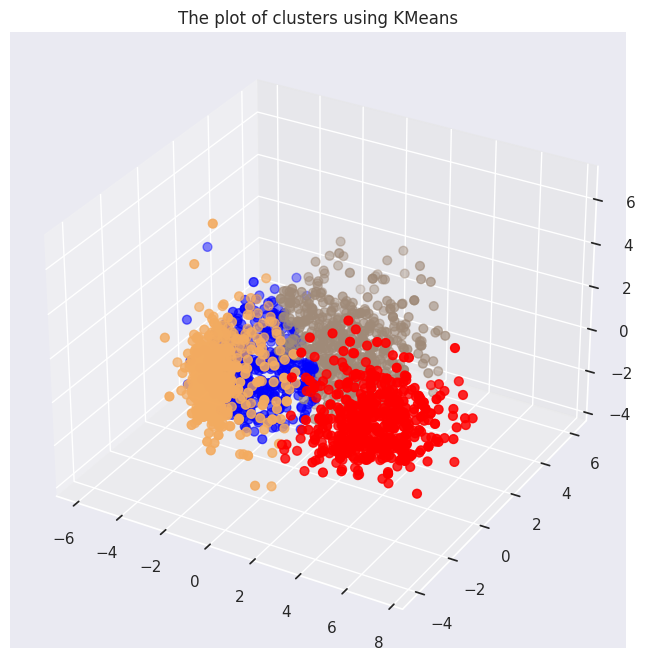

In [89]:
fig = plt.figure(figsize = (10,8))
ax = plt.subplot(111, projection = '3d', label = 'bla')
ax.scatter(x, y , z, s= 40, c = PCA_ds["Clusters2"], marker= 'o',
           cmap = colors.ListedColormap(["#FF0000", "#9E726F", "#0000FF", "#B9C0C9", "#9F8A78", "#F3AB60"]))
ax.set_title("The plot of clusters using KMeans")
plt.show()

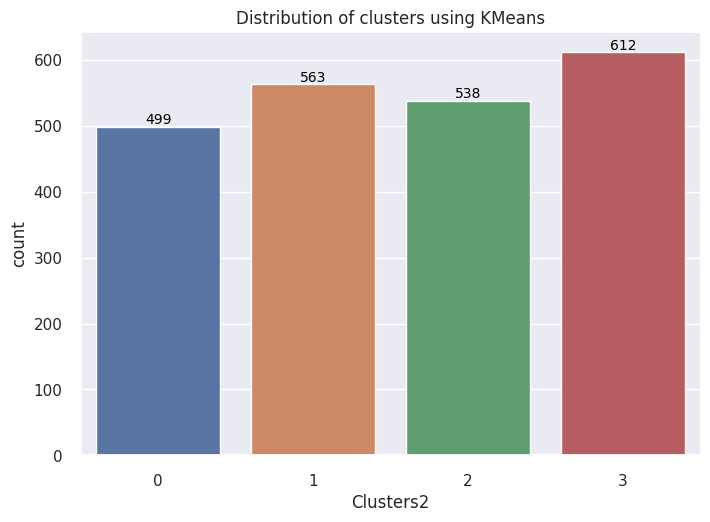

In [90]:
ax = sns.countplot(x = train_data['Clusters2'])
ax.set_title("Distribution of clusters using KMeans")
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=10,
                color='black')
plt.show()

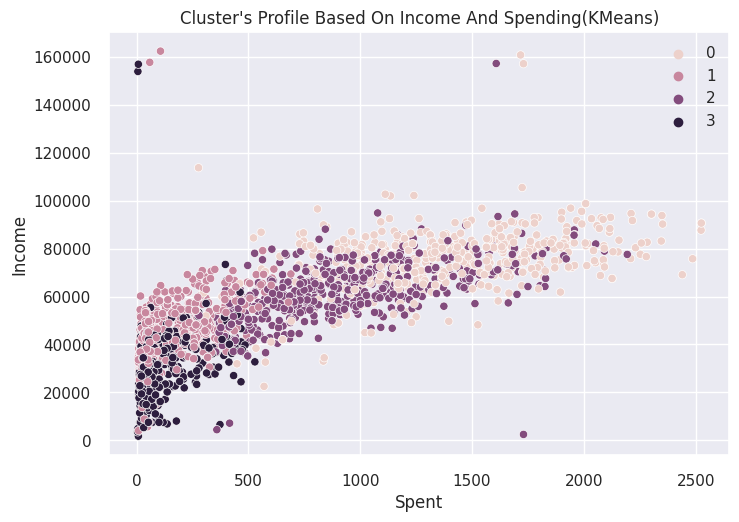

In [91]:
pl = sns.scatterplot(data = train_data,x=train_data["Spent"], y=train_data["Income"],hue=train_data["Clusters2"])
pl.set_title("Cluster's Profile Based On Income And Spending(KMeans)")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 56.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 70.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 61.8% of the points cannot be place

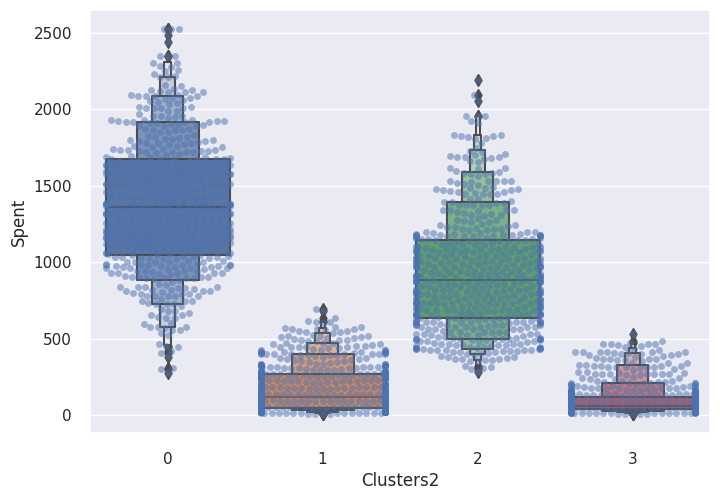

In [92]:
pl = sns.swarmplot(x = train_data['Clusters2'], y = train_data['Spent'],
                   alpha = 0.50)
pl = sns.boxenplot(x = train_data['Clusters2'],
                   y = train_data['Spent'])
plt.show()

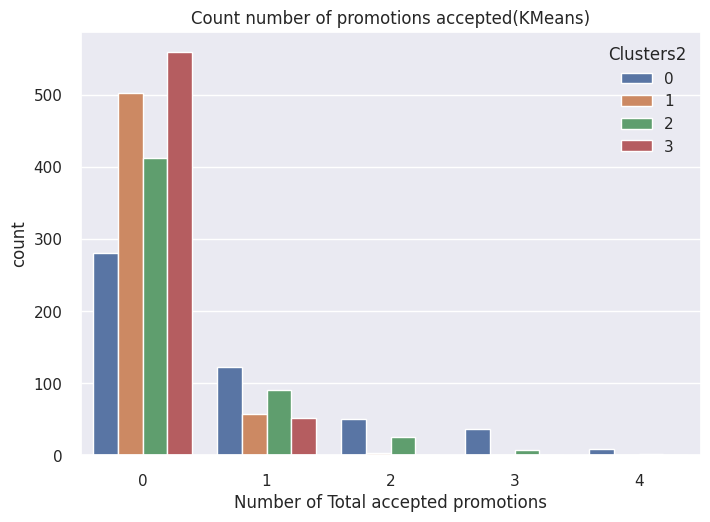

In [93]:
# We will now explore how our campaigns went in the past(sum of accepted promotions)
train_data['Total_Promos'] = (train_data['AcceptedCmp1'] + train_data['AcceptedCmp2'] + train_data['AcceptedCmp3'] +
                              train_data['AcceptedCmp4'] + train_data['AcceptedCmp5'])

#Plotting count of total campaign acecpted
plt.figure()
ax = sns.countplot(x = train_data['Total_Promos'], hue = train_data["Clusters2"])
ax.set_title("Count number of promotions accepted(KMeans)")
ax.set_xlabel('Number of Total accepted promotions')
plt.show()

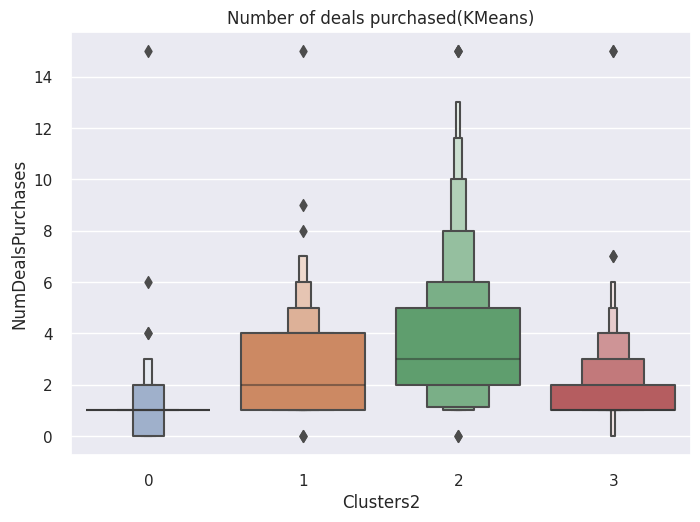

In [94]:
#Plotting number of deals purchased
plt.figure()
ax = sns.boxenplot(y = train_data['NumDealsPurchases'], x = train_data['Clusters2'])
ax.set_title('Number of deals purchased(KMeans)')
plt.show()

Now we will profile clusters**(by KMeans)** formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team

<Figure size 800x550 with 0 Axes>

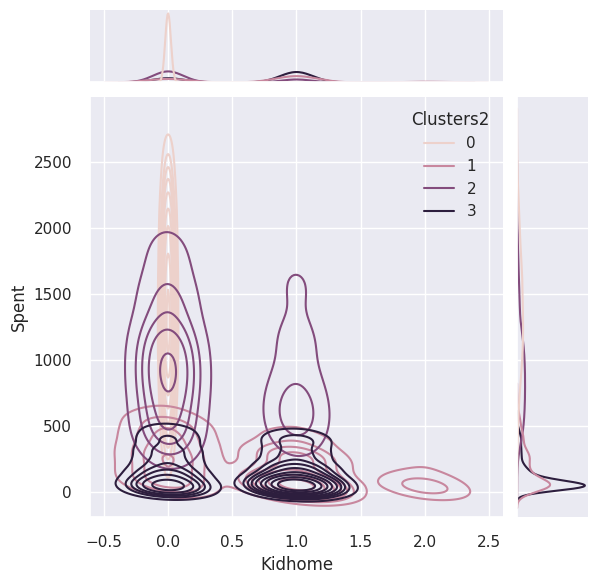

<Figure size 800x550 with 0 Axes>

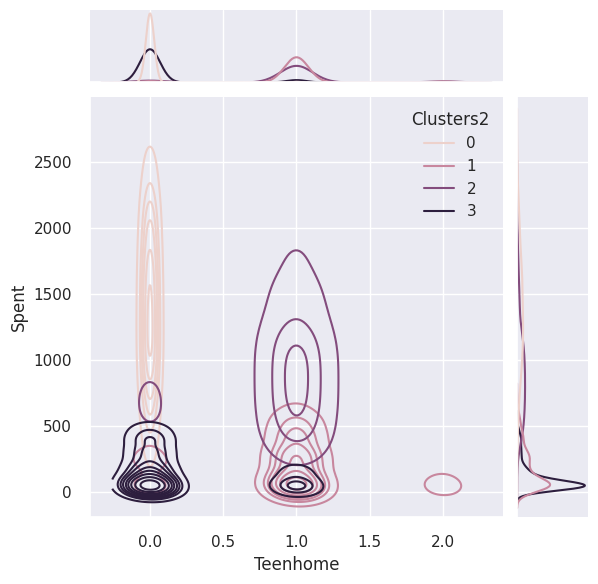

<Figure size 800x550 with 0 Axes>

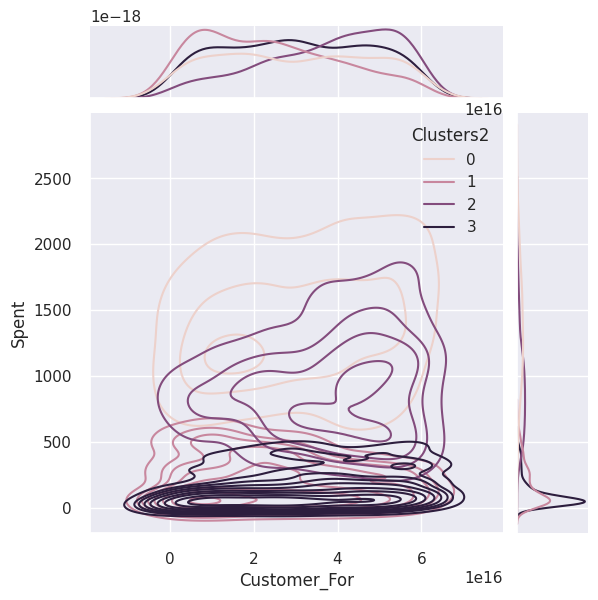

<Figure size 800x550 with 0 Axes>

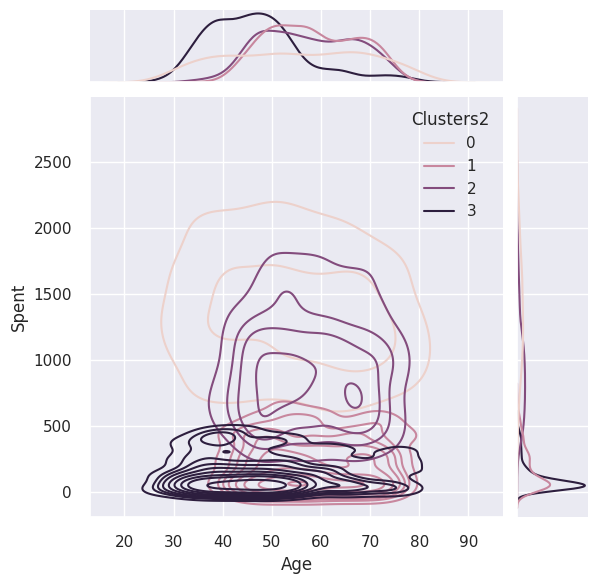

<Figure size 800x550 with 0 Axes>

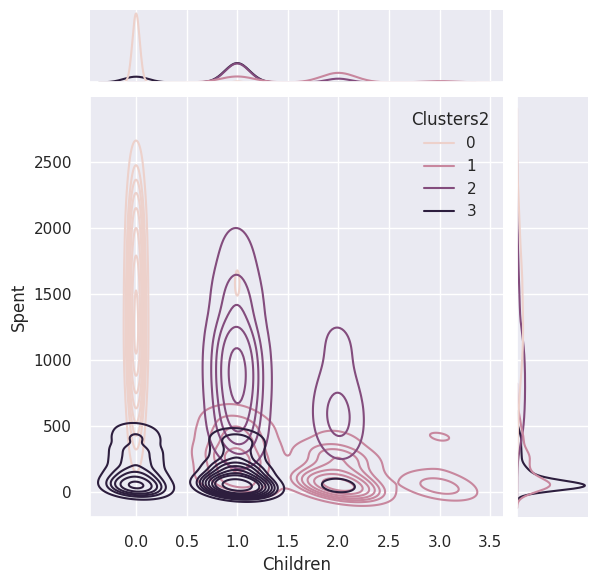

<Figure size 800x550 with 0 Axes>

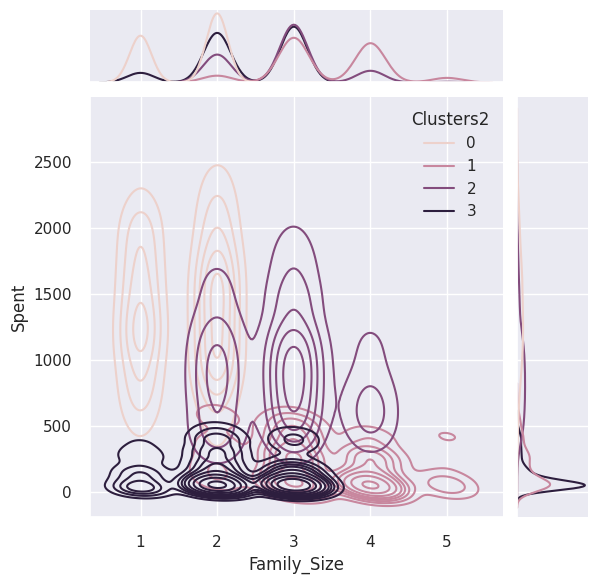

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

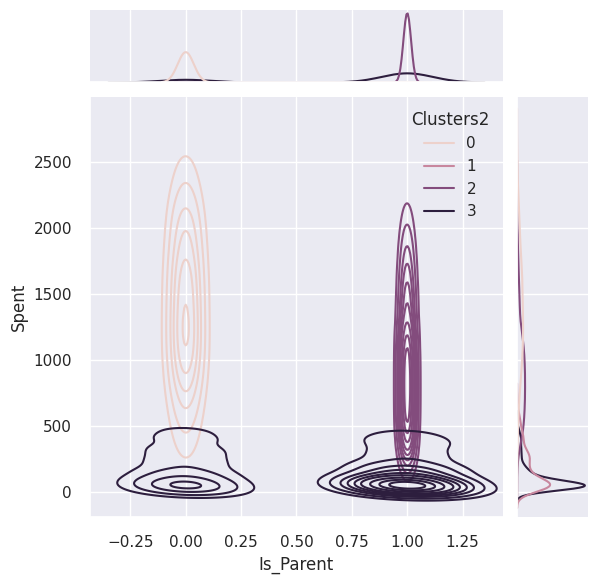

<Figure size 800x550 with 0 Axes>

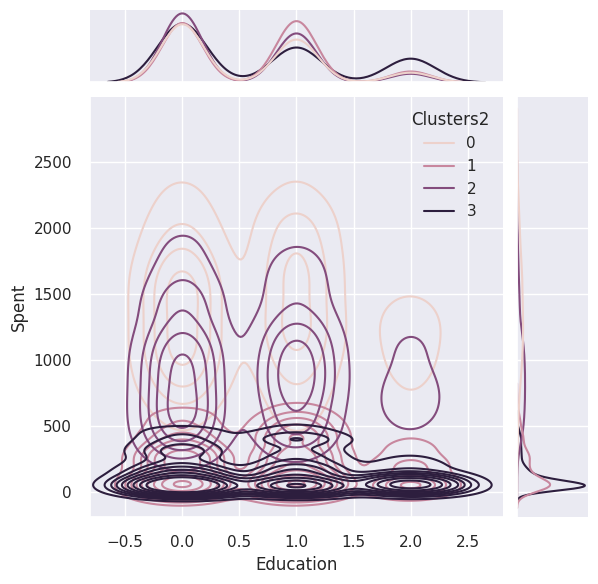

<Figure size 800x550 with 0 Axes>

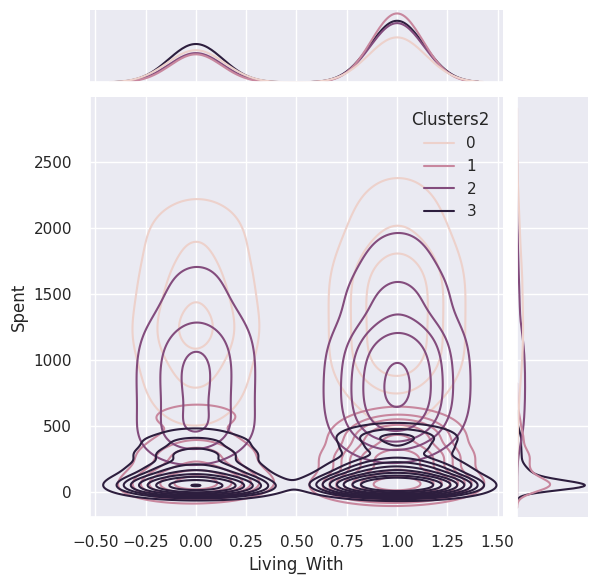

In [116]:
Colum = ['Kidhome', 'Teenhome', 'Customer_For', 'Age','Children', 'Family_Size',
         'Is_Parent', 'Education', 'Living_With']
for i in Colum:
  plt.figure()
  sns.jointplot(x = train_data[i], y = train_data['Spent'], hue = train_data['Clusters2'], kind = 'kde')
  plt.show()

**Kmeans insights**

**Cluster 0**

- No children.

- Family size is 1 to 2, and mostly people from higher age bracket(30-70 years) are there

- Moderate to high income and moderate to high spending.

**Cluster 1**

- More than 1 teenager and kids at home.

- Family size is between 3-5, and mostly people are from the age bracket 20-50 years.

- Can be  a parent

- Low spending and low to moderate income.

**Cluster 2**

- Minimumn 1 teen and 1 kid at home.

- Age bracket between 40 to 60 years.

- Parent

- Family size is between 2 to 4.

- Moderate income and moderate spending.


**Cluster 3**

- Kid and teenager may or may not be there.

- Family size of 1 to 3.

- People are from the younger age bracket 20-50 years.

- Low income and low expenses.


Evaluating KMeans

In [96]:
train_kmeans = train_data.copy()
train_kmeans.head()

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0          0  58138.0        0         0       58       635         88   
1          0  46344.0        1         1       38        11          1   
2          0  71613.0        0         0       26       426         49   
3          0  26646.0        1         0       26        11          4   
4          1  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...       Customer_For  \
0              546              172                88  ...  57283200000000000   
1                6                2                 1  ...   9763200000000000   
2              127              111                21  ...  26956800000000000   
3               20               10                 3  ...  12009600000000000   
4              118               46                27  ...  13910400000000000   

   Age  Spent  Living_With  Children  Family_Size  Is_Parent  Clusters  \
0   66   1617            0         0            1          0         2   
1   69     27            0         2            3          1         3   
2   58    776            1         0            2          0         2   
3   39     53            1         1            3          1         1   
4   42    422            1         1            3          1         3   

   Total_Promos  Clusters2  
0             0          0  
1             0          1  
2             0          0  
3             0          3  
4             0          1  

[5 rows x 33 columns]

In [97]:
train_kmeans.drop('Clusters', inplace= True, axis=1)
train_kmeans.head()

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0          0  58138.0        0         0       58       635         88   
1          0  46344.0        1         1       38        11          1   
2          0  71613.0        0         0       26       426         49   
3          0  26646.0        1         0       26        11          4   
4          1  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Response  \
0              546              172                88  ...         1   
1                6                2                 1  ...         0   
2              127              111                21  ...         0   
3               20               10                 3  ...         0   
4              118               46                27  ...         0   

        Customer_For  Age  Spent  Living_With  Children  Family_Size  \
0  57283200000000000   66   1617            0         0            1   
1   9763200000000000   69     27            0         2            3   
2  26956800000000000   58    776            1         0            2   
3  12009600000000000   39     53            1         1            3   
4  13910400000000000   42    422            1         1            3   

   Is_Parent  Total_Promos  Clusters2  
0          0             0          0  
1          1             0          1  
2          0             0          0  
3          1             0          3  
4          1             0          1  

[5 rows x 32 columns]

In [98]:
y_means= train_kmeans['Clusters2'].values
y_means = np.reshape(y_means, (-1,1))
print(y_means)

[[0]
 [1]
 [0]
 ...
 [0]
 [2]
 [1]]


In [99]:
X_means = train_kmeans.drop('Clusters2', axis = 1).values


In [100]:
print(silhouette_score(X = X_means, labels = y_means))

-0.08455676187169597


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


***GMM(Gaussian Mixture Models)***

In [101]:
from sklearn.mixture import GaussianMixture
model= GaussianMixture(n_components = 4)
yhat_gmm = model.fit_predict(PCA_ds)
PCA_ds["Clusters4"] = yhat_gmm
train_data["Clusters4"] =yhat_gmm

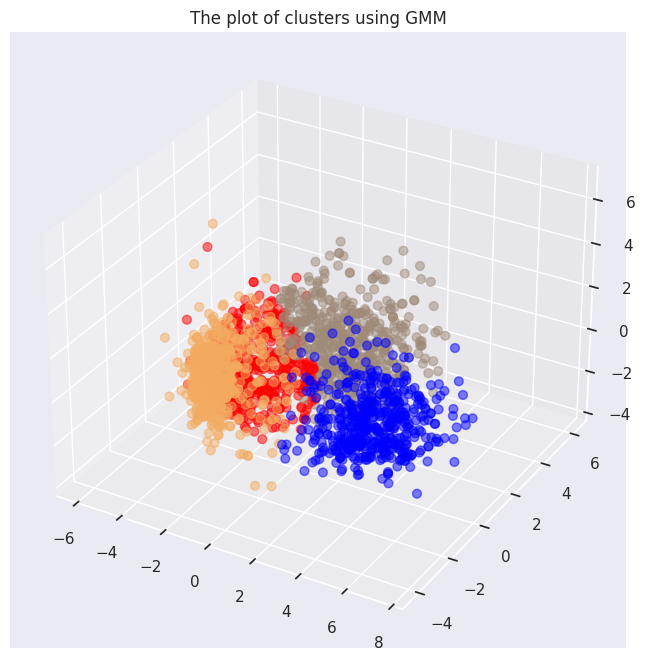

In [102]:
fig = plt.figure(figsize = (10,8))
ax = plt.subplot(111, projection = '3d', label = 'bla')
ax.scatter(x, y , z, s= 40, c = PCA_ds["Clusters4"], marker= 'o',
           cmap = colors.ListedColormap(["#FF0000", "#9E726F", "#0000FF", "#B9C0C9", "#9F8A78", "#F3AB60"]),alpha = 0.5)
ax.set_title("The plot of clusters using GMM")
plt.show()

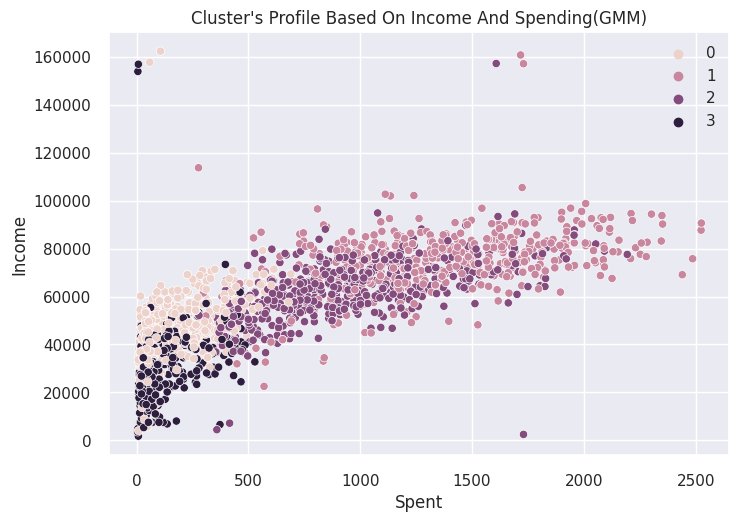

In [103]:
pl = sns.scatterplot(data = train_data,x=train_data["Spent"], y=train_data["Income"],hue=train_data["Clusters4"])
pl.set_title("Cluster's Profile Based On Income And Spending(GMM)")
plt.legend()
plt.show()

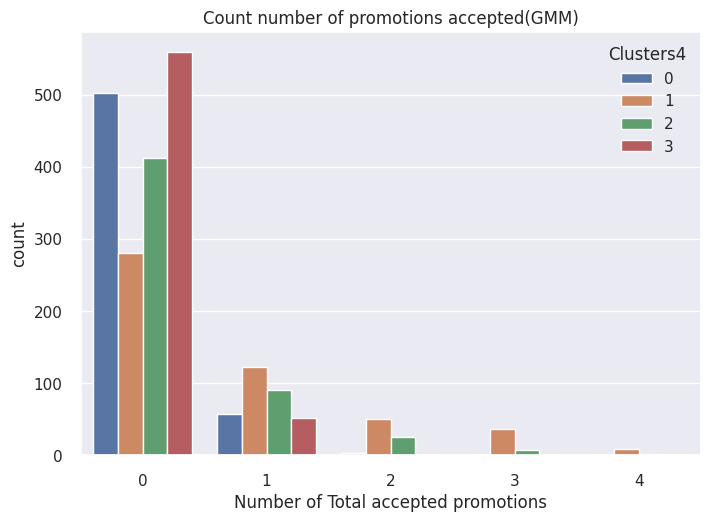

In [104]:
#Plotting count of total campaign acecpted
plt.figure()
ax = sns.countplot(x = train_data['Total_Promos'], hue = train_data["Clusters4"])
ax.set_title("Count number of promotions accepted(GMM)")
ax.set_xlabel('Number of Total accepted promotions')
plt.show()

Now we will profile clusters formed**(using GMM)** and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team

<Figure size 800x550 with 0 Axes>

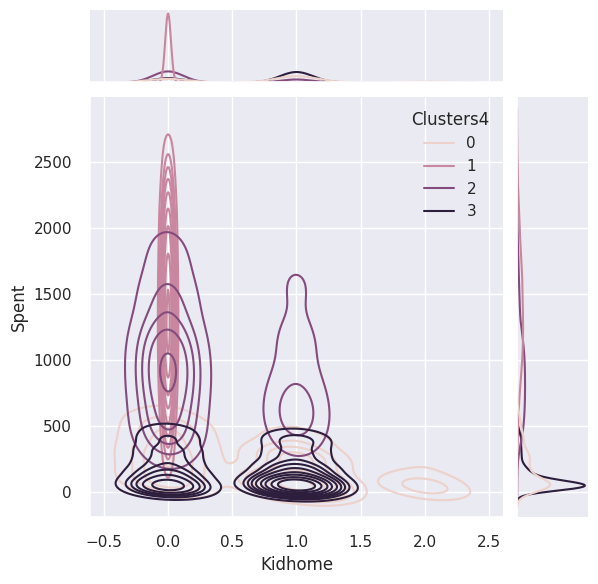

<Figure size 800x550 with 0 Axes>

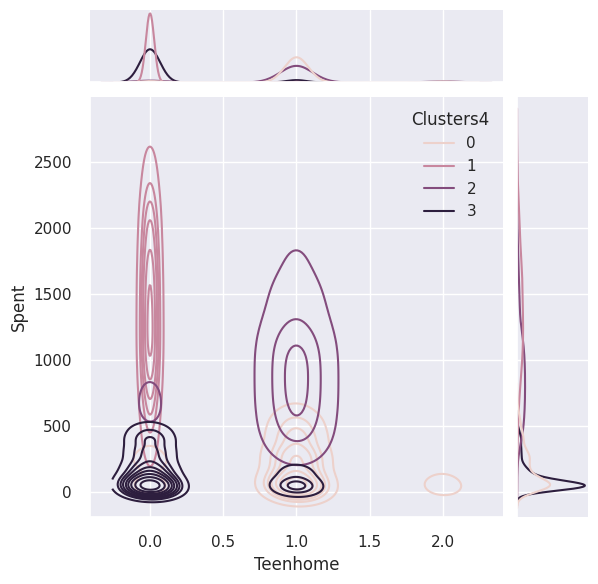

<Figure size 800x550 with 0 Axes>

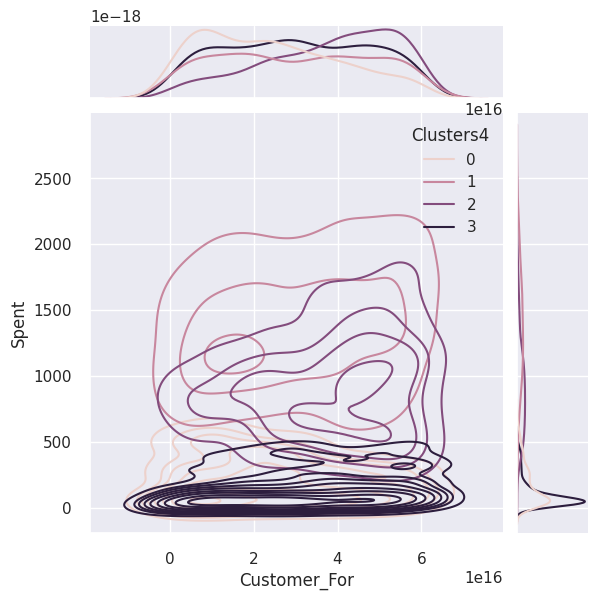

<Figure size 800x550 with 0 Axes>

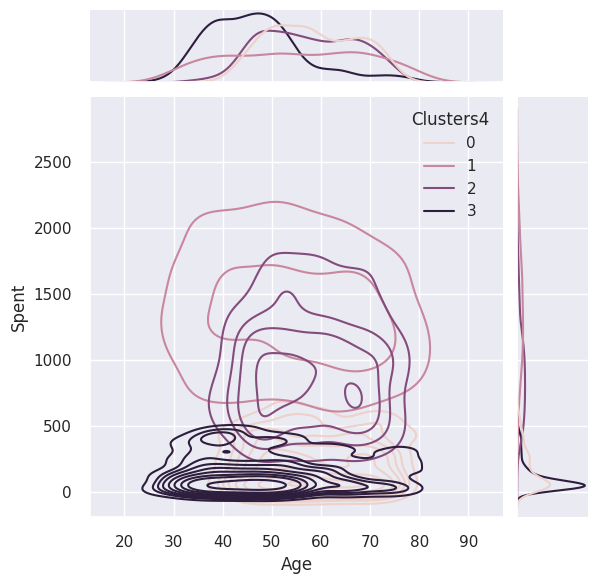

<Figure size 800x550 with 0 Axes>

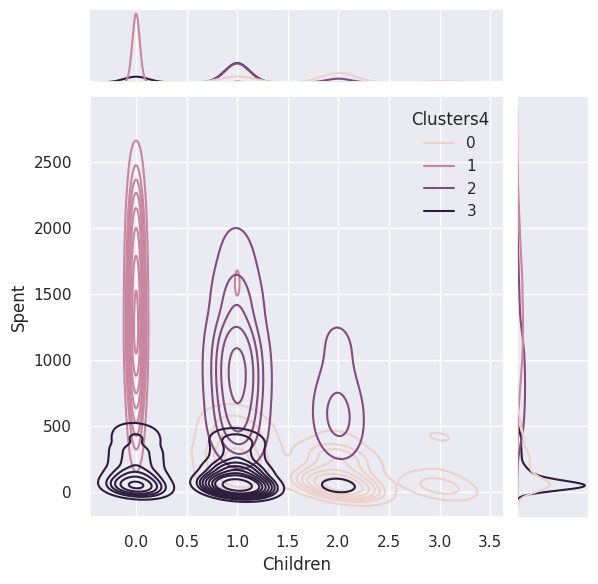

<Figure size 800x550 with 0 Axes>

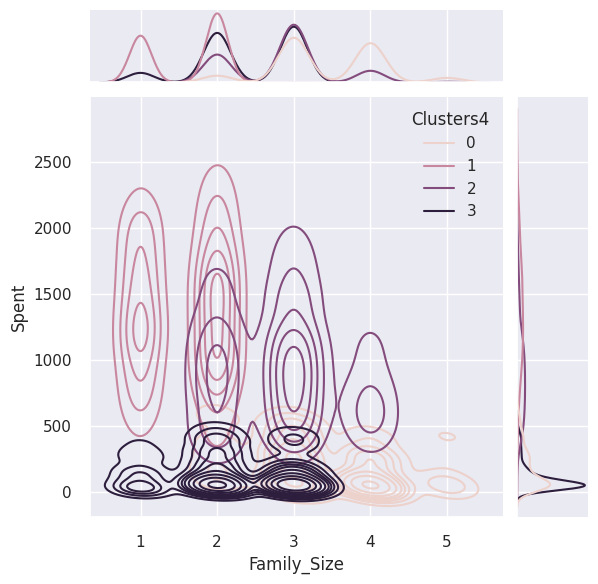

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

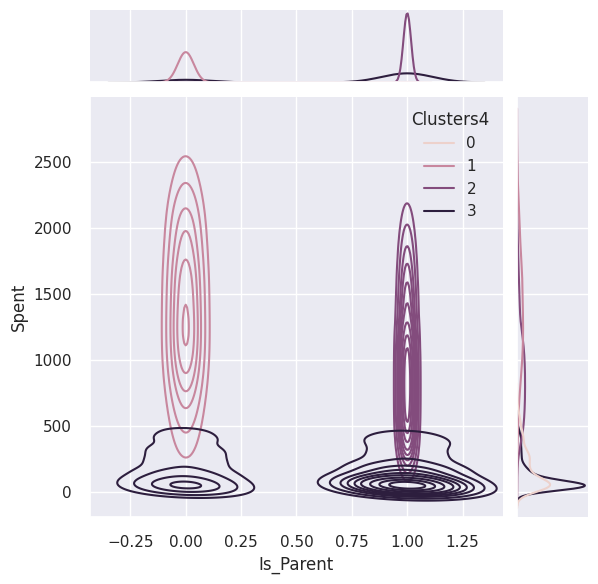

<Figure size 800x550 with 0 Axes>

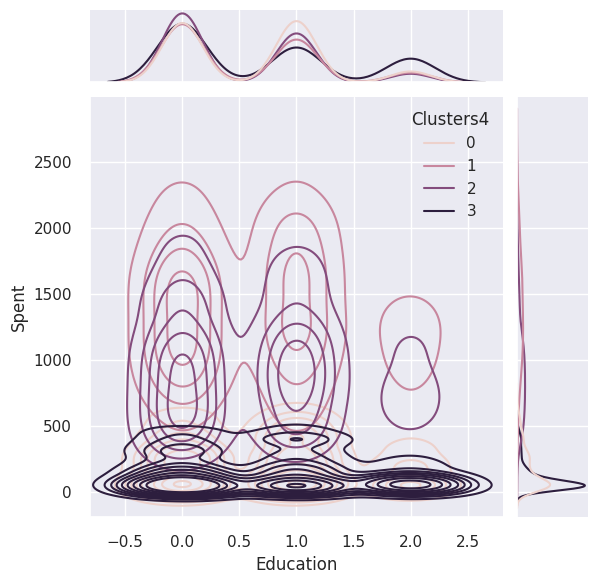

<Figure size 800x550 with 0 Axes>

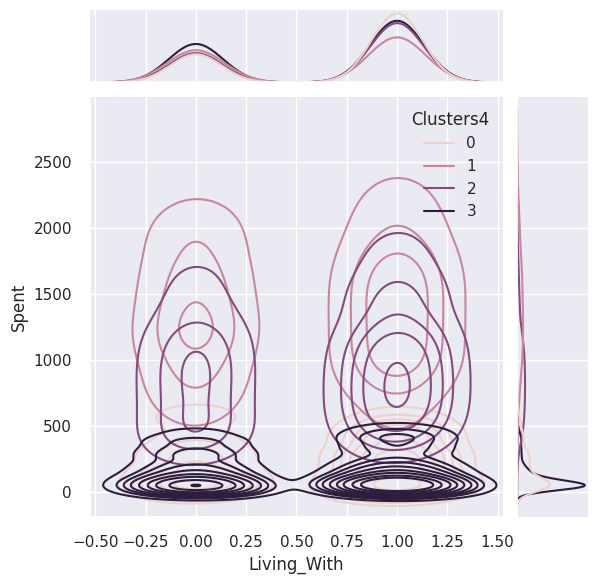

In [105]:

Colum = ['Kidhome', 'Teenhome', 'Customer_For', 'Age','Children', 'Family_Size',
         'Is_Parent', 'Education', 'Living_With']
for i in Colum:
  plt.figure()
  sns.jointplot(x = train_data[i], y = train_data['Spent'], hue = train_data['Clusters4'], kind = 'kde')
  plt.show()

**Insights(Gaussian Mixture Model)**


**Cluster 0**

- Definitely a parent

- Children between 1 and 4

- Teen at home

- Relatively older and higher spending


**Cluster 1**

- Can  be a parent

- Family size between 2 and 4

- Kid home may be there

- 1 Teen

- Low spent and lowincome


**Cluster 2**

- Parent

- Family size between  1 to 5

- Mostly age between 30 to 50

- 1 to 2 teens at home

**Cluster 3**

- Family size between 1 and 2

- No children and teen at home

- Age bewtween 40 to 80 years

- Not parent

- Low income and moderate spending

In [ ]:
train_data.head()

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0          0  58138.0        0         0       58       635         88   
1          0  46344.0        1         1       38        11          1   
2          0  71613.0        0         0       26       426         49   
3          0  26646.0        1         0       26        11          4   
4          1  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Spent  \
0              546              172                88  ...   1617   
1                6                2                 1  ...     27   
2              127              111                21  ...    776   
3               20               10                 3  ...     53   
4              118               46                27  ...    422   

   Living_With  Children  Family_Size  Is_Parent  Clusters  Total_Promos  \
0            0         0            1          0         2             0   
1            0         2            3          1         3             0   
2            1         0            2          0         2             0   
3            1         1            3          1         1             0   
4            1         1            3          1         0             0   

   Clusters2  Clusters3  Clusters4  
0          2         -1          0  
1          3          0          2  
2          2          5          0  
3          0          1          2  
4          1          2          0  

[5 rows x 35 columns]

Evaluating GMM

In [106]:
print(train_data['Clusters4'].value_counts())

3    612
0    563
2    538
1    499
Name: Clusters4, dtype: int64


In [107]:
train_gmm1 = train_data.copy()
from sklearn.metrics import silhouette_score

In [112]:
train_gmm1.drop(['Clusters','Clusters2'], inplace =  True, axis = 1)
train_gmm1.head()

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0          0  58138.0        0         0       58       635         88   
1          0  46344.0        1         1       38        11          1   
2          0  71613.0        0         0       26       426         49   
3          0  26646.0        1         0       26        11          4   
4          1  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Response  \
0              546              172                88  ...         1   
1                6                2                 1  ...         0   
2              127              111                21  ...         0   
3               20               10                 3  ...         0   
4              118               46                27  ...         0   

        Customer_For  Age  Spent  Living_With  Children  Family_Size  \
0  57283200000000000   66   1617            0         0            1   
1   9763200000000000   69     27            0         2            3   
2  26956800000000000   58    776            1         0            2   
3  12009600000000000   39     53            1         1            3   
4  13910400000000000   42    422            1         1            3   

   Is_Parent  Total_Promos  Clusters4  
0          0             0          1  
1          1             0          0  
2          0             0          1  
3          1             0          3  
4          1             0          0  

[5 rows x 32 columns]

In [113]:
y_gmm = train_gmm1['Clusters4'].values
y_gmm = np.reshape(y_gmm, (-1,1))
print(y_gmm.shape)
print(y_gmm)

(2212, 1)
[[1]
 [0]
 [1]
 ...
 [1]
 [2]
 [0]]


In [114]:
X_gmm = train_gmm1.drop('Clusters4', axis =1).values
# X_gmm.reshape(-1,1)


In [115]:
print(silhouette_score(X = X_gmm, labels = y_gmm))

-0.08455676187169597


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


After applying the three clustering algorithms, Agglomerate Clustering, KMeans and Gaussiam Mixture Model(GMM) the silhoutte score of the three are as follows

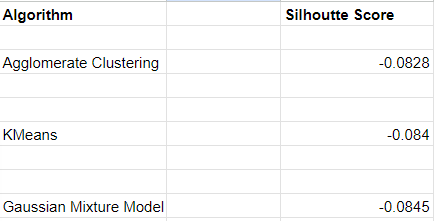

We can see that more or less all three algorithms have performed in a similar mannner, in separating the customers in segments or clusters.

The final insights that can be derieved from the three algorithm are as follows


**Cluster 0**

- Most probably a parent.

- Family size between 1-4 members.

- Most have a teenager at home.

- Mostly old people.


**Cluster 1**

- May be a parent

- Family size between 1 and 3.

- Spans all the ages

- Moderate to high income group.


**Cluster 2**

- Majority are parents

- Family size is between 2 to 4.

- Relatively younger than the above age groups.


**Cluster 3**

- May not be a parent.

- A lower income group.

- At max family size of 5 years.

- Relatively older.



